# Razor Group Data Science Internship Assessment

## Assessment Goals

- Analyze the dataset linked below using Python and present your insights. Please do not do any manual data cleaning (only formula-based sanitization) , and do not use excel for this exercise.This is a sample dataset of publicly available info on ecommerce sellers in the Garden category in the Amazon marketplace.

- Your task is to sanitize and analyze the data to profile the sellers present, and develop selection criteria to identify the best or most promising sellers in this dataset, that the Acquisitions team at Razor should reach out to, and acquire. Before you develop your selection criteria, you will need to sanitize the data , and parse out usable data from the unstructured text. 

In [1]:
# Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Regular Expression
import re

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Excel Data

data = pd.read_excel("Sample_Longlist_Data.xlsx")

In [3]:
# Display First 5 rows

data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [4]:
# Columns in dataset

data.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL'],
      dtype='object')

In [5]:
# Renaming Columns

data.rename(columns={'category': 'Category',
                    'sellerlink': 'Seller_link',
                     'Sample brand name':'Sample_Brand_name',
                    'sellerproductcount' : 'Seller_ProductCount',
                    'sellerratings' : 'Seller_Ratings',
                     'Count of seller brands': 'Seller_BrandsCount',
                     'seller business name' : 'Seller_BusinessName',
                    'sellerdetails' : 'Seller_Details',
                    'businessaddress' : 'Business_Address'},inplace=True)

In [6]:
# Shape of Dataset

print('Shape of Dataset: {}'.format(data.shape))

print('Number of Rows: {}'.format(data.shape[0]))

print('Number of Columns: {}'.format(data.shape[1]))

Shape of Dataset: (1839, 18)
Number of Rows: 1839
Number of Columns: 18


In [7]:
# Information about Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype         
---  ------                                             --------------  -----         
 0   Date Added                                         1839 non-null   datetime64[ns]
 1   Category                                           1839 non-null   object        
 2   Seller_link                                        1839 non-null   object        
 3   sellerlink-url                                     1839 non-null   object        
 4   sellerstorefront-url                               1839 non-null   object        
 5   Seller_ProductCount                                1513 non-null   object        
 6   Seller_Ratings                                     1411 non-null   object        
 7   Seller_Details                                     1812 non-null   object        
 8   Seller_BusinessNam

## Dropping Irrevalant Columns

Columns giving no context should be dropped in order to cleanise the data

- Date Added
- sellerlink-url
- sellerstorefront-url

In [8]:
cols_to_drop = ['Date Added','sellerlink-url','sellerstorefront-url']

data.drop(cols_to_drop,axis = 1,inplace=True)

## Null Value Treatment

In [9]:
# Initially Replacing Nan Values with 0

cols = ['Seller_ProductCount','Seller_Ratings','Business_Address','Seller_BusinessName','Seller_Details']

for col in cols:
    
    data[col].replace(np.nan,0,inplace=True)

# Data Cleaning

### Cleaning Seller Business Name Column

In [10]:
for i,val in enumerate(data['Seller_BusinessName']):
    
    if val != 0:
    
        vals = val.split(':')

        if len(vals) == 1:
            data['Seller_BusinessName'].iloc[i] = data['Seller_BusinessName'].iloc[i].replace(val,vals[0])
        else:
            data['Seller_BusinessName'].iloc[i] = data['Seller_BusinessName'].iloc[i].replace(val,vals[-1])

###  Extract Seller Product Count

In [11]:
for i,val in enumerate(data['Seller_ProductCount']):
    
    if val != 0:
        
        sentence = data['Seller_ProductCount'].iloc[i]
        
        # Regex Pattern to extract numbers from the string
        pattern = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', sentence)
    
        split_str = pattern[-1].split(',')

        to_repr = ''.join(split_str)

        data['Seller_ProductCount'].iloc[i] = data['Seller_ProductCount'].iloc[i].replace(val,to_repr)

In [12]:
# Change Datatype of Seller Product Count column to int

data['Seller_ProductCount'] = data['Seller_ProductCount'].astype('int')

## Total Ratings and % Positive Rating

In [13]:
# Cleaning Total Ratings and % Positive Rating

# Created New Column 'Seller_PositiveRatings (%)' and initialized to contain values of Seller_Ratings Column
data['Seller_PositiveRatings(%)'] = data['Seller_Ratings']

# Created New Column 'Seller Total Ratings' and initialized to contain values of Seller_ProductCount Column
data['Seller_TotalRatings'] = data['Seller_ProductCount']


for i,val in enumerate(data['Seller_Ratings']):
    
    if val != 0:
        
        sentence = data['Seller_Ratings'].iloc[i]
        
        # % Positive
        pos = re.findall(r'^\d{1,3}', sentence)
        
        # Total Rating
        total = re.findall(r'\b\d{1,3}(?:,\d{3})*(?:\.\d+)?(?!\d)', sentence)
        
        # Replaced Original value with % Positive
        data['Seller_PositiveRatings(%)'].iloc[i] = data['Seller_PositiveRatings(%)'][i].replace(val,pos[0])
        
        # Assign to total rating extracted
        data['Seller_TotalRatings'].iloc[i] = total[-1]

In [14]:
# Change Datatype of Seller Product Count column to int

data['Seller_PositiveRatings(%)'] = data['Seller_PositiveRatings(%)'].astype('int')

# Change Datatype of Seller Product Count column to int

data['Seller_TotalRatings'] = data['Seller_TotalRatings'].astype('int')

# Drop Column Seller Ratings

data.drop('Seller_Ratings',axis = 1,inplace=True)

### Extract Business Country Code from Business_Address Column

In [15]:
# Created New Column 'Seller Business Country', initialized to contain values of SellerProductCount
data['Seller_Business_Country'] = data['Business_Address']

for i,val in enumerate(data['Business_Address']):
    
    if val != 0:
        
        sentence = data['Business_Address'].iloc[i]
        
        # Country Code
        repr_val = re.findall(r'[A-Z]{1,2}', sentence)
        
        data['Seller_Business_Country'].iloc[i] = data['Seller_Business_Country'].iloc[i].replace(val,repr_val[-1])

In [16]:
# Drop Business_Address Column

data.drop('Business_Address',axis = 1,inplace=True)

### Given that Razor group does not acquire Chinese sellers at the moment. 
#### Hence rows having CN Business Country Code (China) need to be dropped.

In [17]:
# Value Counts of Unique Business Country Code

data['Seller_Business_Country'].value_counts()

CN    1237
DE     364
0       75
GB      47
IT      25
US      14
ES      14
NL      12
FR      11
HK      10
AT       8
PL       5
IN       4
CZ       2
IE       2
JP       2
SE       1
S        1
TH       1
PT       1
CH       1
AU       1
BE       1
Name: Seller_Business_Country, dtype: int64

### Observations

- <b>It can be observed that a majority of sellers are from China (CN)</b>
<br>
<br>
- <b>0 represents Missing Business Country Code</b>

In [18]:
# Storing Index of Rows containing Sellers having Business Location as China (CN)

idx = []

for i,val in enumerate(data['Seller_Business_Country']):
    if val == 'CN':
        idx.append(i)

In [19]:
len(idx)

1237

In [20]:
# Dropping all records for sellers having China as their business location

rows = data.index[idx]

data.drop(rows,axis=0,inplace=True)

In [21]:
# Modified Shape of data

data.shape

(602, 16)

## Extract Seller's Emails from Seller_Details Column

In [22]:
# Created New Column 'Seller_email', initialized to contain values of Seller_ProductCount Column
data['Seller_email'] = data['Seller_ProductCount']

for i,val in enumerate(data['Seller_Details']):
    
    if val != 0:
    
        line = data['Seller_Details'].iloc[i]

        # Regex pattern that matches emails from string
        pattern = re.findall(r'[\w.+-]+@[\w-]+\.[\w.-]+', line)
        
        # No email found
        if len(pattern) < 1:
            data['Seller_email'].iloc[i] = 0
        
        # Multiple email found
        elif len(pattern) >= 2:
            to_rep = ", ".join(pattern)
            data['Seller_email'].iloc[i] = to_rep
        
        # Only 1 email found
        else:
            data['Seller_email'].iloc[i] = pattern[0]

## Extract Seller's Phone numbers from Seller_Details Column

In [23]:
# Created New Column 'Seller_PhoneNums', initialized to contain values of Seller_ProductCount Column
data['Seller_PhoneNums'] = data['Seller_ProductCount']

for i,val in enumerate(data['Seller_Details']):
    
    if val != 0:
        
        line = data['Seller_Details'].iloc[i]
        
        # Search for phone number in pattern
        pattern = re.findall(r'[\+\(]?[1-9][0-9 .\-\(\)]{8,}[0-9]', line)
        
        # If no phone numbers found
        if len(pattern) < 1:
            data['Seller_PhoneNums'].iloc[i] = 0
        
        # If exact 1 phone number found
        elif len(pattern) == 1:
            data['Seller_PhoneNums'].iloc[i] = pattern[0]
        
        # If multiple phone numbers found
        else:
            res = []
            
            # Check and append unique numbers having length greater than equal to 10
            for k in set(pattern):
                if len(k) < 10:
                    continue
                res.append(k)
            
            to_rep = ", ".join(res)
            
            data['Seller_PhoneNums'].iloc[i] = to_rep

In [24]:
# Drop Seller_Details Column

data.drop('Seller_Details',axis = 1,inplace=True)

### Reordering columns

In [25]:
data.columns

Index(['Category', 'Seller_link', 'Seller_ProductCount', 'Seller_BusinessName',
       'Seller_BrandsCount', 'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample_Brand_name', 'Sample Brand URL', 'Seller_PositiveRatings(%)',
       'Seller_TotalRatings', 'Seller_Business_Country', 'Seller_email',
       'Seller_PhoneNums'],
      dtype='object')

In [26]:
# Reordering Columns

cols = ['Category','Seller_link','Seller_BusinessName','Sample_Brand_name',
        'Seller_email','Seller_PhoneNums','Seller_Business_Country',
        'Seller_BrandsCount','Seller_ProductCount','Max % of negative seller ratings - last 30 days',
        'Max % of negative seller ratings - last 90 days','Max % of negative seller ratings - last 12 months',
        'Seller_PositiveRatings(%)','Seller_TotalRatings','Hero Product 1 #ratings','Hero Product 2 #ratings',
        'Sample Brand URL']

In [27]:
# Re-index Columns

data = data.reindex(columns=cols)

## Cleaned Dataset

In [28]:
# Reset rows index

data.set_index('Category',inplace=True)

data.reset_index(inplace=True)

In [29]:
# Display first 10 rows

data.head(5)

,Category,Seller_link,Seller_BusinessName,Sample_Brand_name,Seller_email,Seller_PhoneNums,Seller_Business_Country,Seller_BrandsCount,Seller_ProductCount,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Seller_PositiveRatings(%),Seller_TotalRatings,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample Brand URL
0,Garden,Seller 1,Lohas Living Inc,Visit the YAMAZAKI Store,jadgemaello@gmail.com,"10022-6630, 30-0961431, +1208-964-6807",US,16,100000,17,11,12,88,118,5873,4957,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,Garden,Seller 2,1a-Handelsagentur,Visit the tesa Store,"info@1a-handelsagentur.de, info@1a-handelsagen...","39932-829721, 39932 - 829721",DE,0,0,2,2,9,90,566,0,0,https://www.amazon.de/-/en/stores/tesa/page/12...
2,Garden,Seller 6,0,Strata,0,0,0,13,28,0,0,0,0,28,3284,2944,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,Garden,Seller 15,Oliver Mills,Unbekannt,webmaster@9pm-store.de,15140008562,DE,15,919,0,0,3,97,116,1446,921,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...
4,Garden,Seller 20,ABC-Schnäppchenmarkt GmbH,Visit the TFA Dostmann Store,abc-markt@web.de,0,DE,0,0,18,20,20,76,12,0,0,https://www.amazon.de/-/en/stores/TFA+Dostmann...


#### Dropping rows having no information about their Business name, Contact Details and having Total Product Count < 25

In [30]:
# Subsetting Dataframe to contain rows having Null BusinessName
# Observation -> Majority of seller having Product Count less than 25 and Null BusinessName tends to have null values in contact details as well

#temp_df = data[data['Seller_BusinessName'] == 0]

idx = data[(data['Seller_BusinessName'] == 0) & (data['Seller_ProductCount'] < 25)].index

rows = data.index[idx]

data.drop(rows,axis=0,inplace=True)

#### Dropping rows having Product Count < 20, Total Ratings < 10 and Rating of Hero Product 1 < 20

In [31]:
# Reorganizing Index of Dataframe so that rows can be dropped easily

data.set_index('Category',inplace=True)

data.reset_index(inplace=True)

# Store Index of such records

idx = data[(data['Seller_ProductCount'] < 20) & (data['Seller_TotalRatings'] < 10) & (data['Hero Product 1 #ratings'] < 20)].index

rows = data.index[idx]

data.drop(rows,axis=0,inplace=True)

In [32]:
# Shape of Modified Dataset

print('Shape of Dataset: {}'.format(data.shape))

print('Number of Rows: {}'.format(data.shape[0]))

print('Number of Columns: {}'.format(data.shape[1]))

Shape of Dataset: (564, 17)
Number of Rows: 564
Number of Columns: 17


# Exploratory Data Analysis

In [33]:
# Important -> 0 represent Null value in certain columns

In [34]:
# Identifying Numerical Columns

numerical_cols = list(data.select_dtypes('int64'))

numerical_cols

['Seller_BrandsCount',
 'Max % of negative seller ratings - last 30 days',
 'Max % of negative seller ratings - last 90 days',
 'Max % of negative seller ratings - last 12 months',
 'Hero Product 1 #ratings',
 'Hero Product 2 #ratings']

In [35]:
# Identifying Categorical Columns

categorical_cols = list(data.select_dtypes('object'))

categorical_cols

['Category',
 'Seller_link',
 'Seller_BusinessName',
 'Sample_Brand_name',
 'Seller_email',
 'Seller_PhoneNums',
 'Seller_Business_Country',
 'Sample Brand URL']

In [36]:
# Descriptive Statistics

data.describe()

,Seller_BrandsCount,Seller_ProductCount,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Seller_PositiveRatings(%),Seller_TotalRatings,Hero Product 1 #ratings,Hero Product 2 #ratings
count,564.000000,564.000000,564.000000,564.00000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,10.148936,5575.920213,5.668440,6.12234,7.583333,88.565603,217.542553,4387.453901,2424.306738
std,6.482589,17387.481618,15.045048,12.93834,13.790174,18.731750,1353.655625,10600.879484,6599.559914
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,83.750000,0.000000,0.00000,0.000000,88.000000,13.000000,30.750000,13.000000
50%,14.000000,647.000000,0.000000,1.00000,3.000000,94.000000,48.000000,656.500000,309.000000
75%,15.000000,2000.000000,4.000000,7.00000,8.000000,98.000000,182.000000,3615.000000,1825.500000
max,16.000000,200000.000000,100.000000,100.00000,100.000000,100.000000,30000.000000,86856.000000,70732.000000


#### Dropping records having Max % of negative seller ratings - last 12 months >= 90 % as these sellers potentially wont be benefical.

In [37]:
# Reorganizing Index of Dataframe so that rows can be dropped easily

data.set_index('Category',inplace=True)

data.reset_index(inplace=True)

# Drop Columns

idx = data[data['Max % of negative seller ratings - last 12 months'] >= 90].index

rows = data.index[idx]

data.drop(rows,axis=0,inplace=True)

In [38]:
data.head(10)

,Category,Seller_link,Seller_BusinessName,Sample_Brand_name,Seller_email,Seller_PhoneNums,Seller_Business_Country,Seller_BrandsCount,Seller_ProductCount,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Seller_PositiveRatings(%),Seller_TotalRatings,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample Brand URL
0,Garden,Seller 1,Lohas Living Inc,Visit the YAMAZAKI Store,jadgemaello@gmail.com,"10022-6630, 30-0961431, +1208-964-6807",US,16,100000,17,11,12,88,118,5873,4957,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,Garden,Seller 2,1a-Handelsagentur,Visit the tesa Store,"info@1a-handelsagentur.de, info@1a-handelsagen...","39932-829721, 39932 - 829721",DE,0,0,2,2,9,90,566,0,0,https://www.amazon.de/-/en/stores/tesa/page/12...
2,Garden,Seller 6,0,Strata,0,0,0,13,28,0,0,0,0,28,3284,2944,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,Garden,Seller 15,Oliver Mills,Unbekannt,webmaster@9pm-store.de,15140008562,DE,15,919,0,0,3,97,116,1446,921,https://www.amazon.de/-/en/Unbekannt/b/ref=bl_...
4,Garden,Seller 20,ABC-Schnäppchenmarkt GmbH,Visit the TFA Dostmann Store,abc-markt@web.de,0,DE,0,0,18,20,20,76,12,0,0,https://www.amazon.de/-/en/stores/TFA+Dostmann...
5,Garden,Seller 21,All Terrain Ireland,Mountfield Outdoor Spares,0,0,IE,14,123,0,0,0,0,123,837,787,https://www.amazon.de/-/en/Mountfield-Outdoor-...
6,Garden,Seller 22,GURU 2016 GmbH,Visit the tesa Store,"support@bauguru.at, office@bauguru.at",78 3848 7000 0038 6060,AT,0,0,0,7,6,92,181,0,0,https://www.amazon.de/-/en/stores/tesa/page/12...
7,Garden,Seller 23,MADEWELL SUPPLY INC,Visit the Seville Classics Store,0,0,US,16,40000,0,0,0,100,10,10538,8293,https://www.amazon.de/-/en/stores/Seville+Clas...
8,Garden,Seller 24,Blumenbecker Industriebedarf GmbH,Visit the tesa Store,bib.beckum@blumenbecker.com,"99-107 59269, 214 670 936",DE,15,100000,15,12,10,88,12,30139,11182,https://www.amazon.de/-/en/stores/tesa/page/12...
9,Garden,Seller 25,Jörg Müller & Petra Scheerer GbR,Neudorff,0,0,DE,15,3000,3,1,2,97,610,3286,3079,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [39]:
# Count of Sellers corresponding to a particular country

dist = data['Seller_Business_Country'].value_counts()

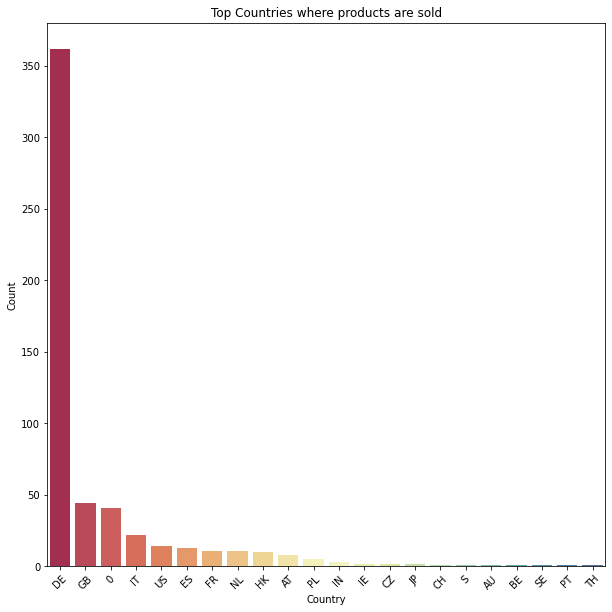

In [40]:
# Plot Distribution of Countries where product are sold by sellers

plt.figure(figsize = (10,10))

sns.barplot(x= dist.index, y = dist.values, palette = 'Spectral')

plt.xlabel('Country')

plt.ylabel('Count')

plt.title('Top Countries where products are sold')

plt.xticks(rotation=45)

plt.show()

## Observations 

- It can be concluded from the following chart that Germany (DE) is the country where majority of sellers have their business.

- Followed by Germany, United Kingdom (GB) is the second most home to sellers

- 0 represents rows having Null country code value

- Least amount of sellers are present in country Switzerland (CH)

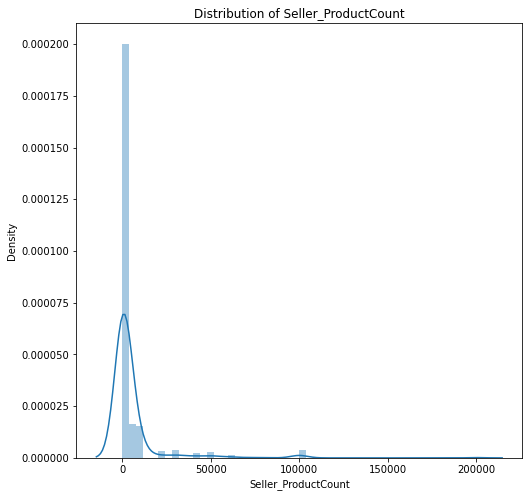

In [41]:
# Distribution of ProductCount of Sellers 

plt.figure(figsize=(8,8))

sns.distplot(data['Seller_ProductCount'])

plt.title("Distribution of Seller_ProductCount")

plt.show()

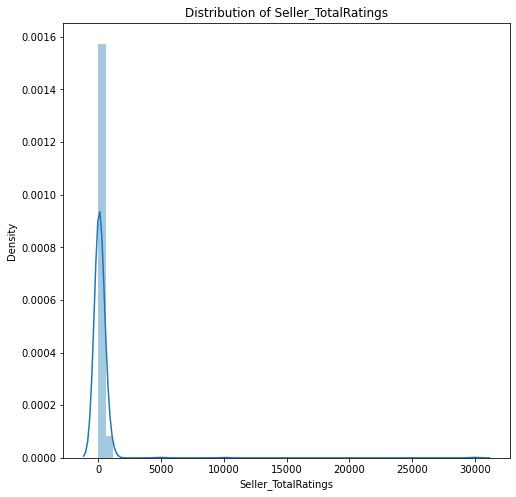

In [42]:
# Distribution of ProductCount of Sellers 

plt.figure(figsize=(8,8))

sns.distplot(data['Seller_TotalRatings'])

plt.title("Distribution of Seller_TotalRatings")

plt.show()

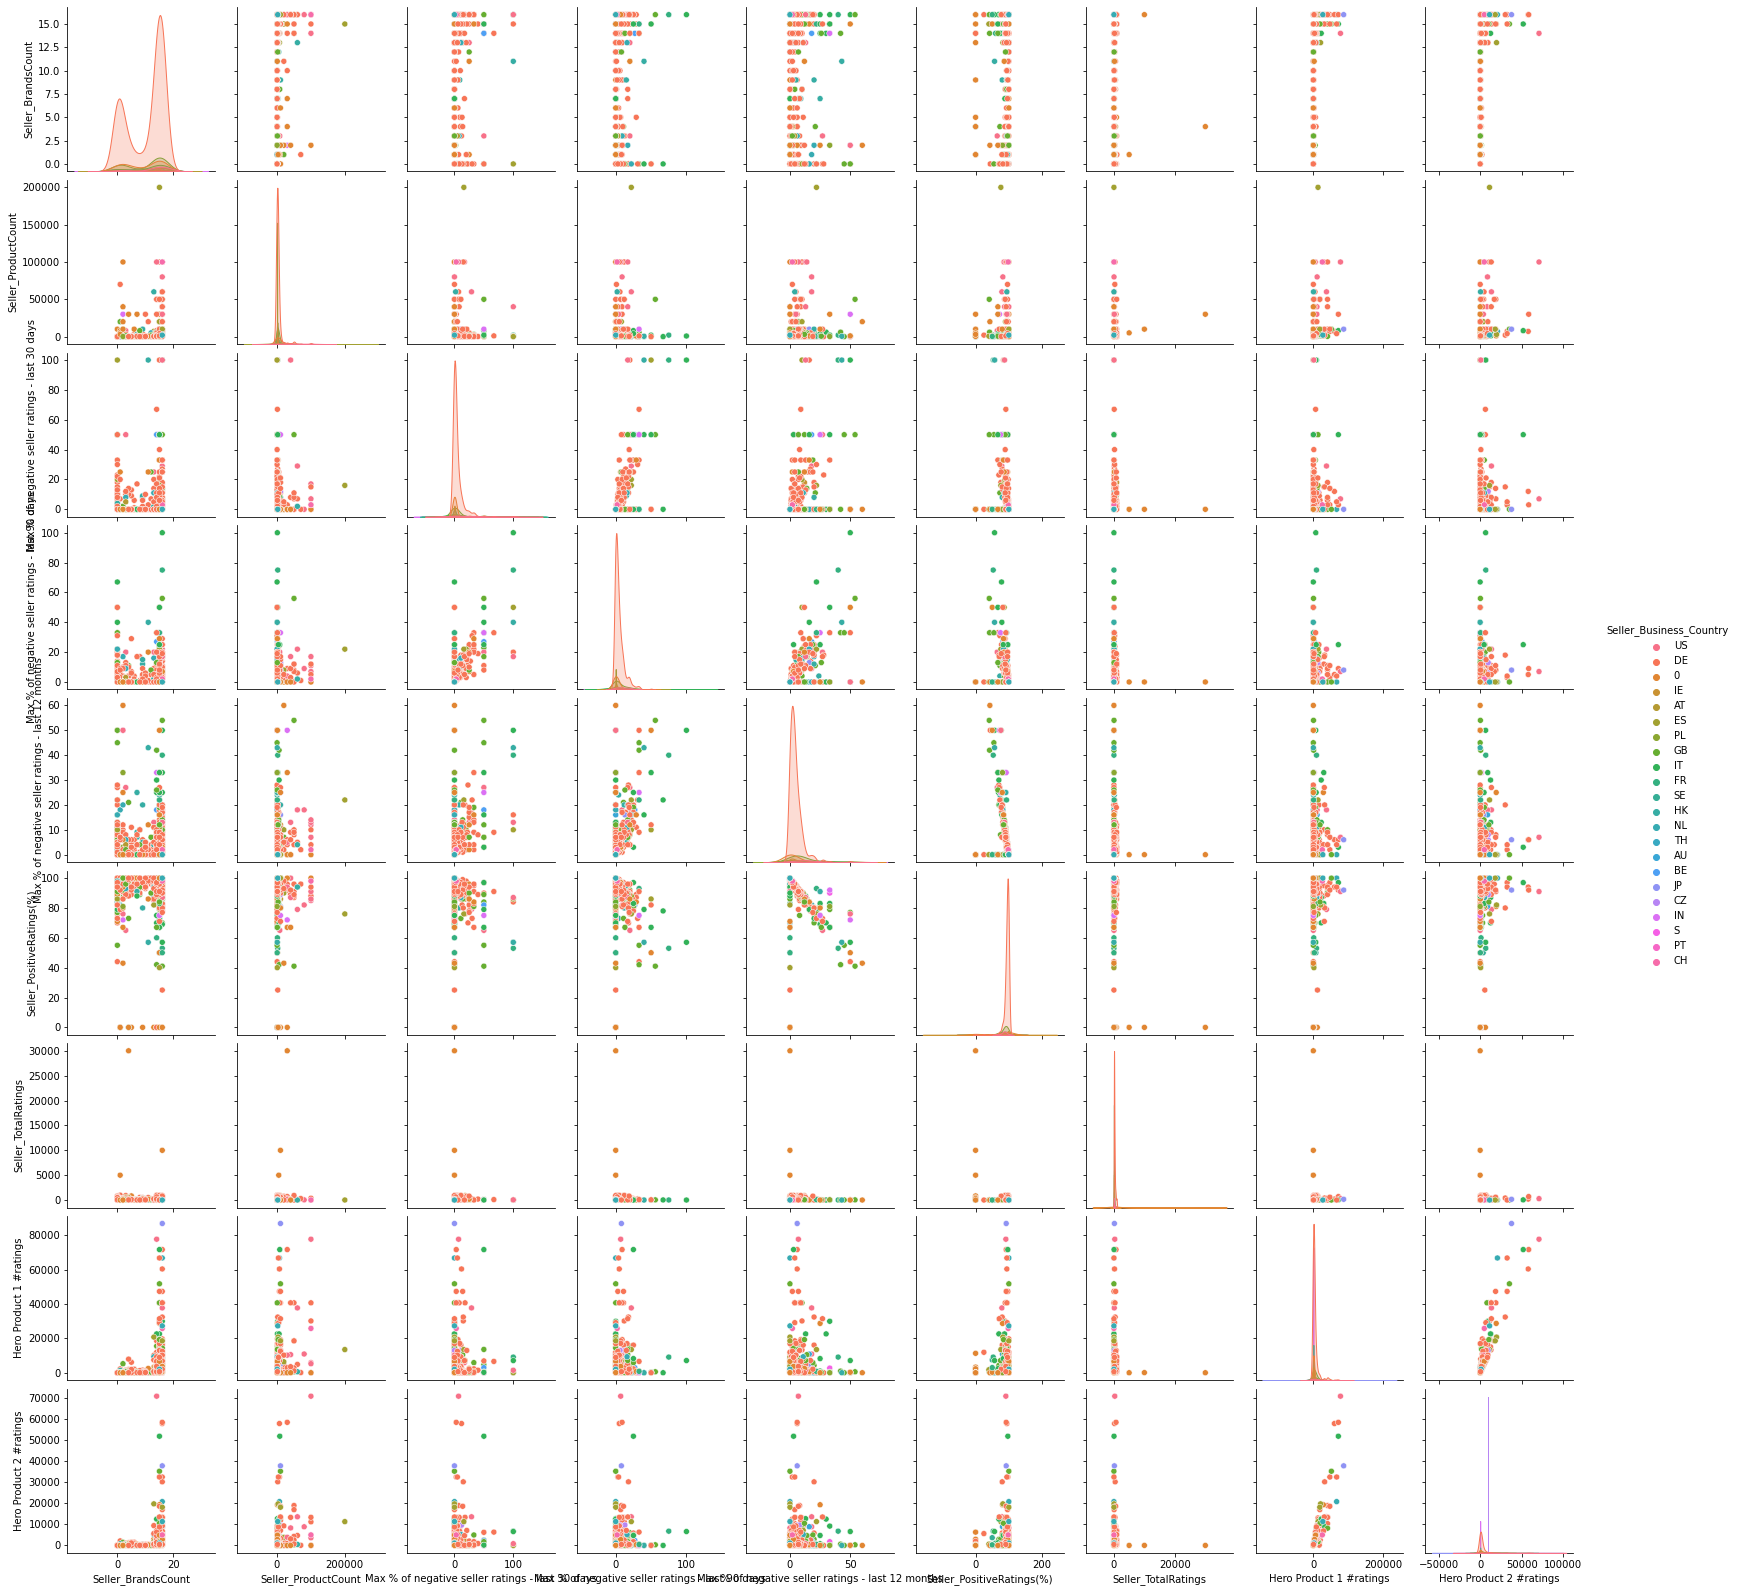

In [43]:
# Pairplot showing correlation between various features with respect to Business Country

sns.pairplot(data, hue="Seller_Business_Country")

plt.show()

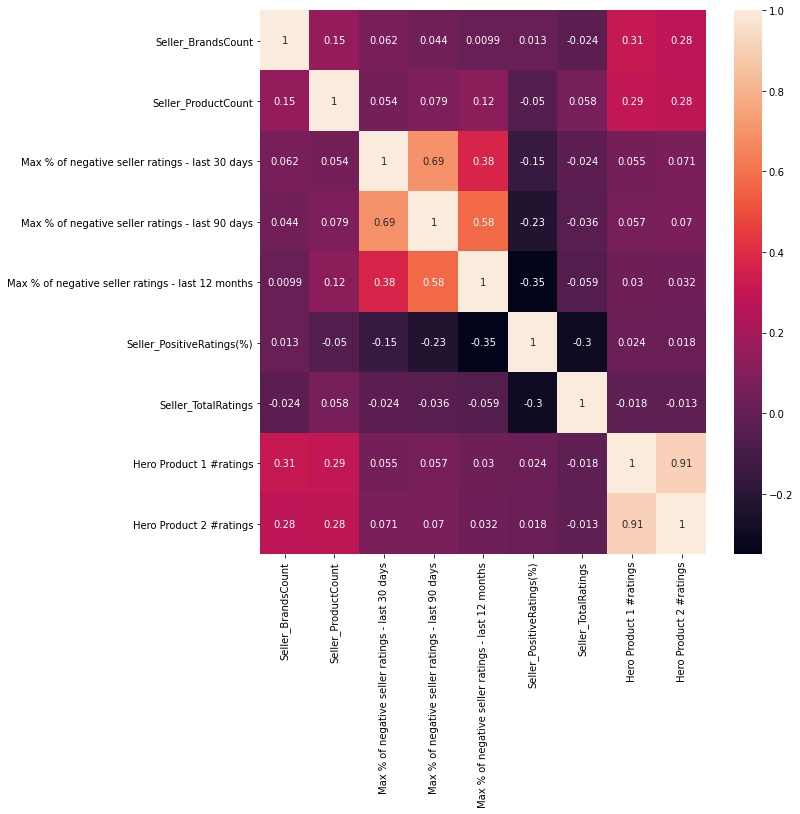

In [44]:
# Heatmap Correlation

plt.figure(figsize=(10,10))

sns.heatmap(data.corr(),annot=True)

plt.show()

### Observations

- Hero Product 1 and Hero Product 2 ratings are highly correlated that means both the top selling products are likely to have equal number of ratings.

- Max % of negative reviews are moderately correlated in terms of days and months.

- Top products of sellers (Hero 1 & 2) are slightly correlated to the total brand count of the seller and the total product count sold by the sellers.

- All other aspects show no correlation between them

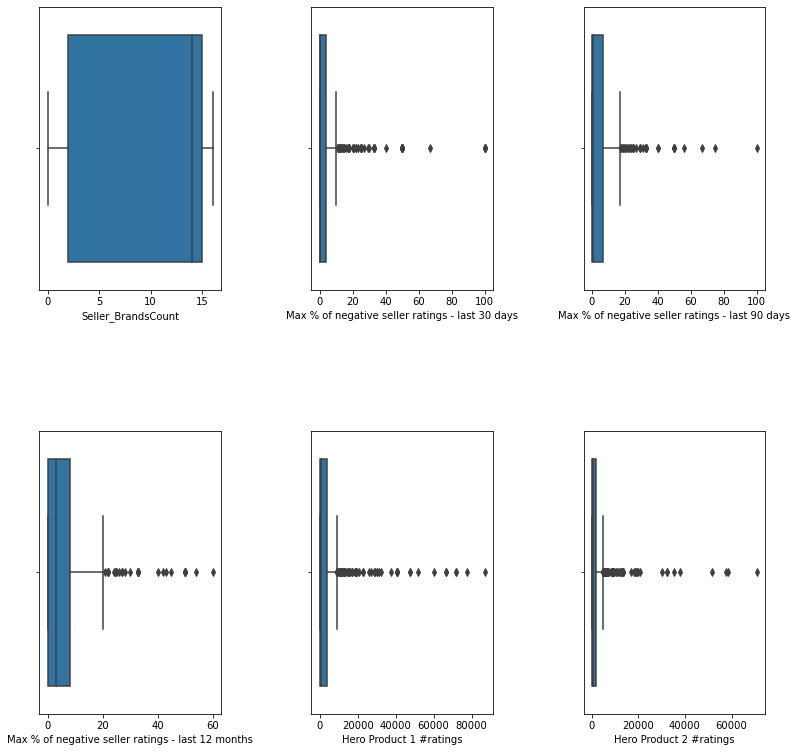

In [45]:
# BoxPlot showing Outliers in Numerical Columns

i = 1

plt.figure(figsize = (13,13))

plt.subplots_adjust(hspace = 0.5, wspace=0.5)

for col in numerical_cols:
    
    plt.subplot(2,3,i)
    
    sns.boxplot(data[col])
    
    i = i+1

### Top Country in terms of Product Count

In [46]:
data.groupby(by=['Seller_Business_Country'], as_index=False)['Seller_ProductCount'].sum().sort_values(by='Seller_ProductCount',
                                                                                          ascending=False)

,Seller_Business_Country,Seller_ProductCount
6,DE,1263659
21,US,663008
0,0,323604
7,ES,248683
9,GB,174432
4,CH,100000
10,HK,75108
12,IN,41000
13,IT,36753
5,CZ,20000


#### Observations

- Germany (DE) has the highest number of Products by the sellers.

- United States (US) has the second highest number of Products.

- Portugal has the least number of products count (Data could be missing)

### Top Sellers in terms of Number of Product Count

In [47]:
# Globally Top Sellers

data.groupby(by=['Seller_link'], as_index=False)['Seller_ProductCount'].sum().sort_values(by='Seller_ProductCount',
                                                                                          ascending=False).head(10)

,Seller_link,Seller_ProductCount
387,Seller 713,200000
0,Seller 1,100000
270,Seller 496,100000
129,Seller 1785,100000
140,Seller 186,100000
552,Seller 986,100000
176,Seller 24,100000
252,Seller 445,100000
225,Seller 34,100000
217,Seller 32,80000


## Identifying Top Sellers per Business Country in terms of Product Count

#### Sellers having high number of products tends to be reliable and trustworthy

In [48]:
# Country wise Top Sellers

df = data.groupby(by=['Seller_link','Seller_Business_Country'], as_index=False)['Seller_ProductCount'].sum().sort_values(by='Seller_ProductCount',
                                                                                          ascending=False)

In [49]:
df.head(10)

,Seller_link,Seller_Business_Country,Seller_ProductCount
387,Seller 713,ES,200000
0,Seller 1,US,100000
270,Seller 496,US,100000
129,Seller 1785,CH,100000
140,Seller 186,US,100000
552,Seller 986,DE,100000
176,Seller 24,DE,100000
252,Seller 445,0,100000
225,Seller 34,US,100000
217,Seller 32,US,80000


## Identifying Top 50 most promising sellers per country with respect to total number of products sold/available per seller

In [50]:
topsellers = {}

country_codes = data['Seller_Business_Country'].unique()

for col in country_codes:
    
    top = df[df['Seller_Business_Country'] == col]['Seller_link'][:50].values
    
    topsellers[col] = top

del topsellers[0]

In [51]:
topsellers

{'US': array(['Seller 1', 'Seller 496', 'Seller 186', 'Seller 34', 'Seller 32',
        'Seller 27', 'Seller 969', 'Seller 23', 'Seller 1031',
        'Seller 438', 'Seller 218', 'Seller 1528', 'Seller 798',
        'Seller 33'], dtype=object),
 'DE': array(['Seller 986', 'Seller 24', 'Seller 277', 'Seller 108', 'Seller 37',
        'Seller 470', 'Seller 916', 'Seller 657', 'Seller 1541',
        'Seller 727', 'Seller 1731', 'Seller 323', 'Seller 885',
        'Seller 679', 'Seller 102', 'Seller 196', 'Seller 1496',
        'Seller 938', 'Seller 1059', 'Seller 832', 'Seller 841',
        'Seller 282', 'Seller 112', 'Seller 1046', 'Seller 967',
        'Seller 973', 'Seller 387', 'Seller 38', 'Seller 539',
        'Seller 448', 'Seller 980', 'Seller 54', 'Seller 322',
        'Seller 805', 'Seller 135', 'Seller 101', 'Seller 863',
        'Seller 268', 'Seller 737', 'Seller 449', 'Seller 1052',
        'Seller 55', 'Seller 790', 'Seller 486', 'Seller 833',
        'Seller 159', 'Seller 

## Top 10 Sellers with respect to total brands sold/available per seller, country wise

In [52]:
# Country wise Top Sellers

df_new = data.groupby(by=['Seller_link','Seller_Business_Country'], as_index=False)['Seller_BrandsCount'].sum().sort_values(by='Seller_BrandsCount',
                                                                                          ascending=False)

In [53]:
topseller_new = {}

country_codes = data['Seller_Business_Country'].unique()

for col in country_codes:
    
    top = df_new[df_new['Seller_Business_Country'] == col]['Seller_link'][:10].values
    
    topseller_new[col] = top

del topseller_new[0]

In [54]:
topseller_new

{'US': array(['Seller 1', 'Seller 27', 'Seller 32', 'Seller 34', 'Seller 23',
        'Seller 969', 'Seller 186', 'Seller 1031', 'Seller 1528',
        'Seller 496'], dtype=object),
 'DE': array(['Seller 392', 'Seller 244', 'Seller 245', 'Seller 248',
        'Seller 256', 'Seller 258', 'Seller 273', 'Seller 276',
        'Seller 281', 'Seller 283'], dtype=object),
 'IE': array(['Seller 36', 'Seller 21'], dtype=object),
 'AT': array(['Seller 150', 'Seller 955', 'Seller 142', 'Seller 231',
        'Seller 884', 'Seller 941', 'Seller 22', 'Seller 743'],
       dtype=object),
 'ES': array(['Seller 1513', 'Seller 713', 'Seller 665', 'Seller 756',
        'Seller 1768', 'Seller 781', 'Seller 242', 'Seller 173',
        'Seller 133', 'Seller 887'], dtype=object),
 'PL': array(['Seller 214', 'Seller 1766', 'Seller 827', 'Seller 56',
        'Seller 513'], dtype=object),
 'GB': array(['Seller 259', 'Seller 707', 'Seller 733', 'Seller 777',
        'Seller 896', 'Seller 606', 'Seller 587', 'Sel

## Top 20 Sellers with respect to total ratings given to their highest selling product, country wise

In [55]:
# Country wise Top Sellers

df_h = data.groupby(by=['Seller_link','Seller_Business_Country'], as_index=False)['Hero Product 1 #ratings'].sum().sort_values(by='Hero Product 1 #ratings',
                                                                                          ascending=False)

In [56]:
topseller_h = {}

country_codes = data['Seller_Business_Country'].unique()

for col in country_codes:
    
    top = df_h[df_h['Seller_Business_Country'] == col]['Seller_link'][:20].values
    
    topseller_h[col] = top

del topseller_h[0]

In [57]:
topseller_h

{'US': array(['Seller 496', 'Seller 27', 'Seller 32', 'Seller 23', 'Seller 1031',
        'Seller 1', 'Seller 34', 'Seller 969', 'Seller 218', 'Seller 798',
        'Seller 1528', 'Seller 438', 'Seller 33', 'Seller 186'],
       dtype=object),
 'DE': array(['Seller 323', 'Seller 883', 'Seller 322', 'Seller 1059',
        'Seller 101', 'Seller 54', 'Seller 986', 'Seller 38', 'Seller 37',
        'Seller 727', 'Seller 838', 'Seller 1046', 'Seller 24',
        'Seller 833', 'Seller 111', 'Seller 387', 'Seller 657',
        'Seller 470', 'Seller 830', 'Seller 256'], dtype=object),
 'IE': array(['Seller 36', 'Seller 21'], dtype=object),
 'AT': array(['Seller 231', 'Seller 142', 'Seller 955', 'Seller 884',
        'Seller 150', 'Seller 941', 'Seller 22', 'Seller 743'],
       dtype=object),
 'ES': array(['Seller 887', 'Seller 1513', 'Seller 713', 'Seller 173',
        'Seller 781', 'Seller 756', 'Seller 1768', 'Seller 242',
        'Seller 665', 'Seller 133', 'Seller 890', 'Seller 28',
     

# Most promising sellers per country that team at Razor Group should reach out to and acquire with respect all of the above analysed aspects

In [58]:
# Merging Dictionaries

d3 = dict(topsellers)

d3.update(topseller_new) 

for i, j in topsellers.items():

    for x, y in topseller_new.items():

        if i == x:

            val = list(j) + list(y)
            
            d3[i] = np.array(val)

In [59]:
# Merged_dictionary -> d3

# Futher merging with another dictionary

final_result = dict(d3)

final_result.update(topseller_h)

for i, j in d3.items():

    for x, y in topseller_h.items():

        if i == x:

            val = list(j) + list(y)
            
            final_result[i] = set(val)

# Final Result

In [60]:
# Top Sellers per country

final_result

{'US': {'Seller 1',
  'Seller 1031',
  'Seller 1528',
  'Seller 186',
  'Seller 218',
  'Seller 23',
  'Seller 27',
  'Seller 32',
  'Seller 33',
  'Seller 34',
  'Seller 438',
  'Seller 496',
  'Seller 798',
  'Seller 969'},
 'DE': {'Seller 101',
  'Seller 102',
  'Seller 1046',
  'Seller 1052',
  'Seller 1059',
  'Seller 108',
  'Seller 111',
  'Seller 112',
  'Seller 135',
  'Seller 1496',
  'Seller 1541',
  'Seller 159',
  'Seller 1731',
  'Seller 1774',
  'Seller 196',
  'Seller 24',
  'Seller 244',
  'Seller 245',
  'Seller 248',
  'Seller 256',
  'Seller 258',
  'Seller 268',
  'Seller 273',
  'Seller 276',
  'Seller 277',
  'Seller 281',
  'Seller 282',
  'Seller 283',
  'Seller 322',
  'Seller 323',
  'Seller 37',
  'Seller 38',
  'Seller 387',
  'Seller 392',
  'Seller 448',
  'Seller 449',
  'Seller 470',
  'Seller 486',
  'Seller 539',
  'Seller 54',
  'Seller 55',
  'Seller 657',
  'Seller 679',
  'Seller 70',
  'Seller 727',
  'Seller 737',
  'Seller 790',
  'Seller 805',

In [61]:
# It was a fun assessment, Thankyou! :)